# Esercitazione 10
7 Maggio 2024

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [25]:
import numpy as np
import scipy.linalg as spLin
import SolveTriangular
import matplotlib.pyplot as plt

In [26]:
def eqnorm(A,b):
 
    G=A.T@A
    condG=np.linalg.cond(G) 
    print("Indice di condizionamento di G ",condG)
    f=A.T@b
    
    L=spLin.cholesky(G,lower=True)
    U=L.T
        
   
    z,flag=SolveTriangular.Lsolve(L,f)
    if flag==0:
        x,flag=SolveTriangular.Usolve(U,z)
    
    
    return x
    
    

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [27]:
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=spLin.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m \times n$ , $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [28]:
def SVDLS(A,b):
    m,n=A.shape  #numero di righe e  numero di colonne di A
    U,s,VT=spLin.svd(A)  #Attenzione : Restituisce U, il numpy-array 1d che contiene la diagonale della matrice Sigma e VT=VTrasposta)
    #Quindi 
    V=VT.T
    thresh=np.spacing(1)*m*s[0] ##Calcolo del rango della matrice, numero dei valori singolari maggiori di una soglia
    k=np.count_nonzero(s>thresh)
    print("rango=",k)
    d=U.T@b
    d1=d[:k].reshape(k,1)
    s1=s[:k].reshape(k,1)
    #Risolve il sistema diagonale di dimensione kxk avene come matrice dei coefficienti la matrice Sigma
    c=d1/s1
    x=V[:,:k]@c 
    residuo=np.linalg.norm(d[k:])**2
    return x,residuo
     


## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
\begin{array}{l}
x_1 = [-3.5, \, -3, \, -2, \, -1.5, \, -0.5, \, 0.5, \, 1.7, \, 2.5, \, 3] ;\\
y_1 = [-3.9, \, -4.8, \, -3.3, \, -2.5, \, 0.3, \, 1.8, \, 4, \, 6.9, \, 7.1] ;\\
x_2 = [-3.14, \, -2.4, \, -1.57, \, -0.7, \, -0.3, \, 0, \, 0.4, \, 0.7, \, 1.57] ;\\
y_2 = [0.02, \, -1, \, -0.9, \, -0.72, \, -0.2, \, -0.04, \, 0.65, \, 0.67, \, 1.1] ;\\
x_3 = [[1.001,\, 1.004,\, 1.005,\,1.0012, \,1.0013,  \, 1.0014,  \, 1.0015, \, 1.0016] ;\\
y_3 = [-1.2, \, -0.95, \, -0.9, \, -1.15, \, -1.1, \, -1] ;\\
\end{array}
$$

al variare del grado $n$ tra 1 e 4.



Indice di condizionamento di G  5.27297104169736
rango= 2
Alpha EQN =  [[1.21492318]
 [1.90511021]]
Alpha QR =  [[1.21492318]
 [1.90511021]]
Alpha SVD =  [[1.21492318]
 [1.90511021]]
Residuo EQN  4.954617839084975
residuo QR  4.954617839084981
Residuo SVD  4.954617839084981


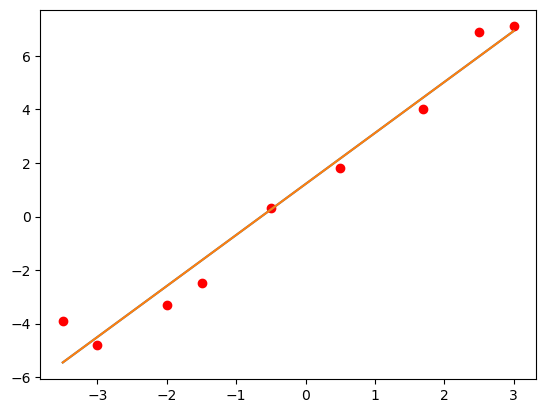

In [29]:
x= np.array([-3.5,-3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3]) 
y = np.array([-3.9,-4.8,-3.3,-2.5, 0.3,1.8,4,6.9,7.1])
#x=np.array( [-3.14,  -2.4,  -1.57,  -0.7,  -0.3,  0,  0.4,  0.7,  1.57]  )
#y=np.array(  [0.02,  -1, -0.9,   -0.72,   -0.2,   -0.04,  0.65,   0.67,   1.1] )
#x  = np.array([1.001, 1.004, 1.005,1.0012, 1.0013,   1.0014,   1.0015,  1.0016])
#y  = np.array([-1.2,-1.0, -0.98,-0.95,-0.9, -1.15, -1.1, -1])
m=x.shape[0]
n=1  #grado del polinomio di regressione
n1=n+1  # gradi di libertà
A=np.vander(x,increasing=True)[:,:n1]
alpha_EQN=eqnorm(A,y)
residuo_eqn=np.linalg.norm(A@alpha_EQN-y.reshape(m,1))**2

alpha_QR,residuo_QR=qrLS(A,y)
alpha_SVD,residuo_SVD=SVDLS(A,y)




print("Alpha EQN = ", alpha_EQN)
print("Alpha QR = ", alpha_QR)
print("Alpha SVD = ", alpha_SVD)

print("Residuo EQN ",residuo_eqn)
print("residuo QR ",residuo_QR)
print("Residuo SVD ",residuo_SVD)
xv=np.linspace(np.min(x),np.max(x),100)
pol_EQN=np.polyval(np.flip(alpha_EQN),xv)
pol_QR=np.polyval(np.flip(alpha_QR),xv)
pol_SVD=np.polyval(np.flip(alpha_SVD),xv)
plt.plot(x,y,'ro',xv,pol_QR,xv,pol_SVD)
plt.show()


## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
\begin{array}{l}
x = [0.0004, \, 0.2507, \, 0.5008, \, 2.0007, \, 8.0013]  ;\\
y = [0.0007, \, 0.0162, \, 0.0288, \, 0.0309, \, 0.0310] ;
\end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



condizionamento di A2  4.663457775986457
Indice di condizionamento di G  21.747838428408542


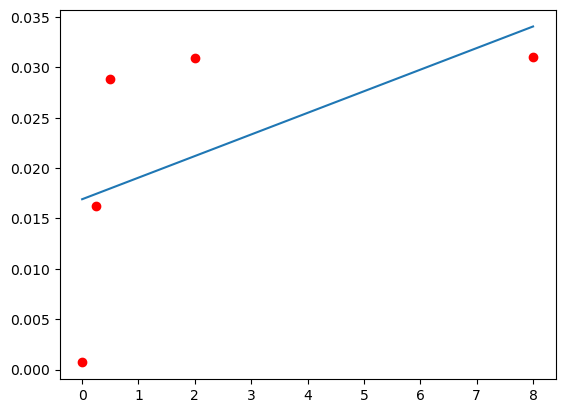

residuo eqn  0.0004848327762313227


In [30]:
x2=np.array([0.0004,0.2507,0.5008,2.0007, 8.0013])
y2=np.array([0.0007,0.0162,0.0288, 0.0309,0.0310])
m=x2.shape[0]
n=1 #retta di regressione: grado 1
n1=n+1  # gradi di libertà
A2=np.vander(x2,increasing=True)[:,:n1]
condA2=np.linalg.cond(A2)
print("condizionamento di A2 ",condA2)
#Poichè la matrice A è ben condizionata uso il metodo delle equazioni normali,
#la matrice G=A.T@A avrà un indice di condizionamento K(A)^2 contenuto
alpha2=eqnorm(A2,y2)
xv=np.linspace(np.min(x2),np.max(x2),100)
pol2=np.polyval(np.flip(alpha2),xv)
plt.plot(xv,pol2,x2,y2,'ro')
plt.show()
residuo_eqn=np.linalg.norm(A2@alpha2-y2.reshape(m,1))**2
print("residuo eqn ",residuo_eqn)

condizionamento di A2  65.6749352562479


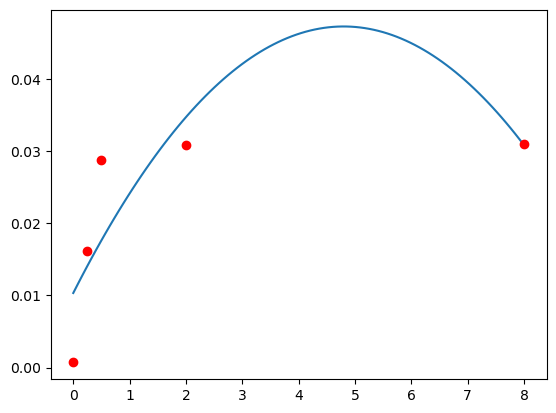

residuo  0.0002364635594024983


In [31]:
n=2 #parabola di regressione: grado 2
n1=n+1  # gradi di libertà
A2=np.vander(x2,increasing=True)[:,:n1]
condA2=np.linalg.cond(A2)
print("condizionamento di A2 ",condA2)
#Poichè la matrice è mediamente ben condizionata (Ha un indice di condizionamento pari a  65.67493525624782
# (quinfi A.T@A avrà indice di condizionamento pari al quadrato dell'indice di condionamento di A)
#è quindi preferibile usare il metodo QR
alpha2,residuo_QR=qrLS(A2,y2)
xv=np.linspace(np.min(x2),np.max(x2),100)
pol2=np.polyval(np.flip(alpha2),xv)
plt.plot(xv,pol2,x2,y2,'ro')
plt.show()
print("residuo ",residuo_QR)

## Esercizio 3:
Scrivere uno script Python per approssimare la seguente configurazione di punti

$$
\begin{array}{l}
x = [10 \, : \, 0.5/5 \, : \, 10.5] ;\\
y = [11.0320, \, 11.1263, \, 11.1339, \, 11.1339, \, 11.1993, \, 11.1844] ;
\end{array}
$$

mediante un polinomio ai minimi quadrati di grado 4 costruito  con il metodo
delle equazioni normali, con il metodo QRLS e con il metodo SVDLS.
Perturbare poi il secondo punto nel seguente modo
$$x(1) = x(1) + 0.013; \quad y(1) = y(1) - 0.001;$$
e calcolare i polinomi ai minimi quadrati relativi alla
configurazione perturbata. Commentare e motivare i risultati ottenuti.



In [32]:
x3=np.arange(10,10.6,0.5/5)
y3 =np.array([11.0320,11.1263,11.1339,11.1339,11.1993,11.1844])

condizionamento di A3  356547012997.1385
Indice di condizionamento di G  1.7553532258796628e+20
residuo eqn 0.0015167608359053083 0.0015167608359053083
residuo qr 0.0001793601604944298
rango= 5
residuo  svd 0.00017936005855011229


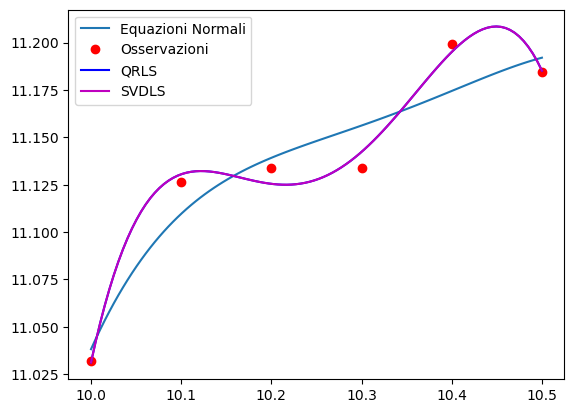

In [33]:
m=x3.size
n=4 # grado del polinomio di regressione: 4
n1=n+1  # gradi di libertà
A3=np.vander(x3,increasing=True)[:,:n1]
condA3=np.linalg.cond(A3)
print("condizionamento di A3 ",condA3)
alpha3_eqn=eqnorm(A3,y3)
xv=np.linspace(np.min(x3),np.max(x3),100)
pol3_eqn=np.polyval(np.flip(alpha3_eqn),xv)
plt.plot(xv,pol3_eqn,x3,y3,'ro')
errore_eqn=np.linalg.norm(A3@alpha3_eqn-y3.reshape(m,1))**2
print("residuo eqn",errore_eqn,errore_eqn)
alpha3_qr,residuo_qr=qrLS(A3,y3)
pol3_qr=np.polyval(np.flip(alpha3_qr),xv)
print("residuo qr",residuo_qr)
plt.plot(xv,pol3_qr,'b')

alpha3_svd,residuo_svd=SVDLS(A3,y3)
pol3_svd=np.polyval(np.flip(alpha3_svd),xv)
print("residuo  svd",residuo_svd)
plt.plot(xv,pol3_svd,'m')
plt.legend(['Equazioni Normali','Osservazioni','QRLS','SVDLS'])
plt.show()
#A causa dell'elevato mal condizionamento di G il metodo delle equazioni normali non approssima i dati in maniera 
# accurata (errore maggiore rispetto agli altri due metodi, che forniscono la stess accuratezza (grafici sovrapposti))

In [34]:
#Ricalcolo il polimonio di grado 4 a partire da dati perturbati come richiesto dall'esercizio
x3p=x3.copy()
x3p[1]= x3p[1] + 0.013
y3p=y3.copy()
y3p[1] = y3p[1] - 0.001

condizionamento di A3  380506144417.48584
residuo qr 0.00020144369415317243
rango= 5
residuo svd 0.00020144362519375862
Indice di condizionamento di G  1.9323872671210885e+19


LinAlgError: 5-th leading minor of the array is not positive definite

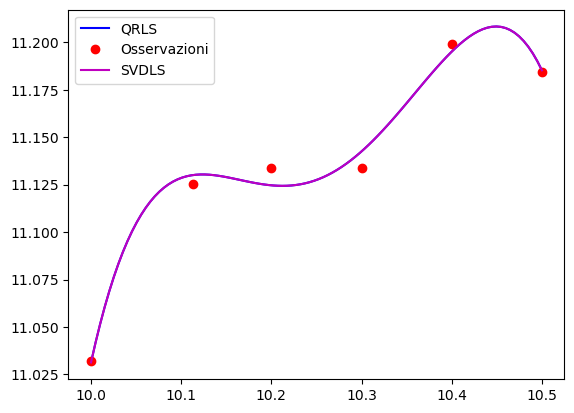

In [35]:
n=4 # grado del polinomio di regressione: 4
n1=n+1  # gradi di libertà
A3=np.vander(x3p,increasing=True)[:,:n1]
condA3=np.linalg.cond(A3)
print("condizionamento di A3 ",condA3)
#Utilizzo del metodo QR
alpha3_qr,residuo_qr=qrLS(A3,y3p)
pol3_qr=np.polyval(np.flip(alpha3_qr),xv)
print("residuo qr",residuo_qr)
plt.plot(xv,pol3_qr,'b',x3p,y3p,'ro')
#Utilizzo del metodo svd
alpha3_svd,residuo_svd=SVDLS(A3,y3p)
pol3_svd=np.polyval(np.flip(alpha3_svd),xv)
print("residuo svd",residuo_svd)
plt.plot(xv,pol3_svd,'m')
plt.legend(['QRLS','Osservazioni','SVDLS'])
#Utilizzo del metodo equazioni normali
alpha3_eqn=eqnorm(A3,y3p)
xv=np.linspace(np.min(x3),np.max(x3),100)
pol3_eqn=np.polyval(np.flip(alpha3_eqn),xv)
plt.plot(xv,pol3_eqn)
residuo_eqn=np.linalg.norm(A3@alpha3_eqn-y3.reshape(m,1))**2
print("errore eqn",errore_eqn)

plt.show()
#SI osserva che a causa dell'elevato indice di condizionamento della matrice A3 (matrice di vandermonde), a causa di una piccola perturbazione sui dati, modifica della coordinata
#x[1] (che interviene nel caclolo della materice di Vandermonde) # la matrice G risulta "numericamente" non  definita positiva e cholesky dà errore.

### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.

In [ ]:
import numpy as np
def plagr(xnodi,j):
    """
    Restituisce i coefficienti del k-esimo pol di
    Lagrange associato ai punti del vettore xnodi
    """
    xzeri=np.zeros_like(xnodi)
    n=xnodi.size
    if j==0:
       xzeri=xnodi[1:n]
    else:
       xzeri=np.append(xnodi[0:j],xnodi[j+1:n])
    
    num=np.poly(xzeri) 
    den=np.polyval(num,xnodi[j])
    
    p=num/den
    
    return p



def InterpL(x, y, xx):
     """"
        %funzione che determina in un insieme di punti il valore del polinomio
        %interpolante ottenuto dalla formula di Lagrange.
        % DATI INPUT
        %  x  vettore con i nodi dell'interpolazione
        %  f  vettore con i valori dei nodi 
        %  xx vettore con i punti in cui si vuole calcolare il polinomio
        % DATI OUTPUT
        %  y vettore contenente i valori assunti dal polinomio interpolante
        %
     """
     n=x.size
     m=xx.size
     L=np.zeros((m,n))
     for j in range(n):
        p=plagr(x,j)
        L[:,j]=np.polyval(p,xx)
    
    
     return L@y

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $\sin(x)$ e $\cos(x)$ nei punti $x_k = k \pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

In [ ]:
x=np.arange(0, 2*np.pi+0.1, np.pi/2)
y1=np.sin(x)
xx=np.arange(0,2*np.pi+0.1,np.pi/40)
yy1=InterpL(x,y1,xx)


plt.plot(xx,yy1,'b--',x,y1,'*',xx,np.sin(xx),'g-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=sin(x)']);
plt.show()

y2=np.cos(x);
yy2=InterpL(x,y2,xx);
plt.plot(xx,yy2,'r--',x,y2,'*',xx,np.cos(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=cos(x)']);

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,\cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

In [ ]:
x=np.linspace(-1,1,4)
f= lambda x: 3*x**3+2*x**2+2*x-1
y=f(x)
xx=np.linspace(-1,1,200)
polL=InterpL(x,y ,xx)
plt.plot(xx,polL,'r--',x,y,'*',xx,f(xx),'c-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','y=3*x**3+2*x**2+2*x-1']);
#Poichè i nodi  (xi.yi) sono ottenuti valutando una funzione che è un polinomio di grado 3
# (che ha quindi derivata quarta nulle) nei punti xi,i=0,3, è nullo l'errore che si commette quando
#alla funzione che ha generato i dati si sostituisce il polinomio interpolatore di grado 3
#Vedi formula dell'errore dell'interpolazione polinomiale nelle dispense teoriche

## Esercizio 3
La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ 
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = \pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = \pm 42$.


In [ ]:
L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])
T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])

# punti di valutazione per l'interpolante
xx=np.linspace(np.min(L),np.max(L),200);
pol=InterpL(L,T,xx);

L1=np.array([42])
pol42=InterpL(L,T,L1)

L2=np.array([-42])
pol_42=InterpL(L,T,L2)

plt.plot(xx,pol,'b--',L,T,'r*',42,pol42,'og',-42,pol_42,'og');
plt.legend(['interpolante di Lagrange','punti di interpolazione','stima 1', 'stima2']);
plt.show()


## Esercizio 4

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = \sin(x)-2 \sin(2x)$,   $ \quad x \in [-\pi,\pi]$,
  -  $f(x) = \sinh(x)$, $ \quad  x \in [-2, 2]$,
  - $f(x) = |x|$,  $ \quad x \in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $\|r(x)\|_{\infty}$ al variare di $n$).


In [ ]:
def zeri_Cheb(a,b,n):
    t1=(a+b)/2
    t2=(b-a)/2
    diff=[]
    x=np.zeros((n+1,))
     
    for k in range(n+1):
        x[k]=t1+t2*np.cos(((2*k+1)/(2*(n+1))*np.pi))
    return x

def chebishev(a, b, n):
    nodes = []
    for i in range (0, n):
        x = (a+b)/2 + ((b-a)/2)*np.cos(((2*i +1)*np.pi)/(2*(n+1)))
        nodes.append(x)
        nodes.sort()
    return nodes

In [ ]:
sceltaf=input("Scegli funzione ")
 
scelta_funzione = {
        '1': [lambda x: np.sin(x)-2*np.sin(2*x),-np.pi, np.pi],
        '2': [lambda x: np.sinh(x),-2,2],
        '3': [lambda x: np.abs(x), -1,1],
        '4': [lambda x: 1/(1+x**2), -5,5]
}

f,a,b=scelta_funzione.get(sceltaf)

sceltap= input("Scegli tipo punti : 1(equidistanti) 2(Chebishev)\n ")

n=int(input('Grado del polinomio'))

scelta_punti = {
        '1': np.linspace(a,b,n+1),
        '2': zeri_Cheb(a,b,n)
        }

x=scelta_punti.get(sceltap)

# punti di valutazione per l'interpolante
xx=np.linspace(a,b,200);


y= f(x)
pol=InterpL(x,y,xx);

plt.plot(xx,pol,'b--',x,y,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','Funzione']);
plt.show()

r=np.abs(f(xx)-pol)
norm_inf_r=np.linalg.norm(r,np.inf)

print("Norma infinito di r ",norm_inf_r)
plt.plot(xx,r,'m-');
plt.legend(['Errore']);
plt.show()

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = \cos \left(\frac{(2i-1)\pi}{2(n + 1)}  \right)$, $i =1, ..., n + 1$.

In [ ]:
xx=np.linspace(-1,1,200);
LLe=np.zeros((4,1));
LLc=np.zeros((4,1));


    
i=0;
for n in range(5,25,5):

    #nodi equispaziati
    xe=np.linspace(-1,1,n+1)
    #nodi di Chebyshev 
    xc=zeri_Cheb(-1,1,n)
    
    Le=np.zeros((200,1));
    Lc=np.zeros((200,1)); 
    for l in range (n+1):        
        pe=plagr(xe,l);
        Le=Le+np.abs(np.polyval(pe,xx))
        pc=plagr(xc,l)
        Lc=Lc+np.abs(np.polyval(pc,xx))
    
    LLe[i]=np.max(Le)
    LLc[i]=np.max(Lc)
    i=i+1
   

print('Costante di Lebesgue con nodi equispaziati al variare di n: \n ',LLe)
plt.semilogy(range(5,25,5), LLe,range(5,25,5),LLc)
plt.legend(["Costante Lebesgue per punti equidistanti","Costante Lebesgue per Chebyshev"])

 
print('Costante di Lebesgue con nodi di Chebyshev al variare di n: \n',LLc)

## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = \sin(2 \pi x_i)$. Si considerino poi le ordinate $\tilde{y}_i = y_i + \varepsilon_i$, dove $\varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $\tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.


In [37]:
f= lambda x: np.sin(2*np.pi*x)
x=np.linspace(-1,1,22)
y1=f(x);

y2=y1.copy()
y2=y2+0.0002*np.random.random(22,)

xx=np.linspace(-1,1,300);
pol1=InterpL(x,y1,xx);
pol2=InterpL(x,y2,xx);



plt.plot(xx,pol1,'b--',x,y1,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione','Funzione']);
plt.show()

plt.plot(xx,pol2,'b--',x,y2,'r*',xx,f(xx),'m-');
plt.legend(['interpolante di Lagrange','punti di interpolazione perturbati','Funzione']);
plt.show()

#errore relativo sui dati
errrel_dati=np.linalg.norm(y2-y1,np.inf)/np.linalg.norm(y1,np.inf)

#errore relativo sui risultati
errrel_risultati=np.linalg.norm(pol2-pol1,np.inf)/np.linalg.norm(pol1,np.inf)

print("Errore relativo sui dati ",errrel_dati)
print("Errore relativo sui risultati ",errrel_risultati)

NameError: name 'InterpL' is not defined